In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy
import gc
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
data = np.random.randn(2000)
fig, axe = plt.subplots(dpi=800)
axe.hist(data)
fig.savefig("img.jpg")
plt.close(fig)

In [10]:
df_num = pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_numeric.csv.zip',compression='zip',usecols = ['Id','Response'])
df_num.head()

,Id,Response
0,4,0
1,6,0
2,7,0
3,9,0
4,11,0


In [3]:
df_num.shape

(1183747, 2)

In [15]:
df = pd.read_csv("C:\\OBS Studio\\self_case_study_file\\train_categorical.csv",nrows=10,low_memory = False)
df.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q. How many number of production line and stations are present in the dataset

In [16]:
columns = df.columns

In [5]:
diff_line = [] #store all the different production lines
diff_st = [] #store all the different stations
diff_fn = [] #store all the different feature number
columns = df.columns
for i in range(1,len(columns)): #iterating every column except Id
    feature = columns[i]
    lst = feature.split("_") #spliting the feature name into line,station and feature number name 
    
    #storing line,station and feature number name in different variable
    line = lst[0]
    st = lst[1]
    fn = lst[2]
    
    if line not in diff_line: #selecting different production line 
        diff_line.append(line)
    if st not in diff_st: #selecting different stations
        diff_st.append(st)
    if fn not in diff_fn: #selecting different feature number
        diff_fn.append(fn)
print(diff_line)
print(len(diff_line))
print(diff_st)
print(len(diff_st))
#print(diff_fn)
print(len(diff_fn))

['L0', 'L1', 'L2', 'L3']
4
['S1', 'S2', 'S3', 'S4', 'S6', 'S9', 'S10', 'S11', 'S14', 'S15', 'S16', 'S18', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S35', 'S36', 'S38', 'S39', 'S42', 'S43', 'S44', 'S46', 'S47', 'S49']
34
2140


There are total 2140 categorical features with lots of Nan values. Here L refers to the production line S refers to the station number and F followed by the integer refers corresponding feature value. The Nan values are not random or typing mistake it is because every product don't go through every production line or station. It goes some specific stations and production line.
<br>
There are total 4 different production lines
<br>
There are total 34 different stations 
<br>
There are total 2140 different feature numbers

# Q. How many products are gone through the each production line

In [5]:
#creating two list to store no of products passes through each production line and its no of failure for the total dataset
final_count_each_line = [0,0,0,0]
final_failure_each_line = [0,0,0,0]

"""
As we already know that this dataset is too large so to load total datast using pandas is not possible for a 8GB RAM laptop. 
So I store them in different chunk of size 10000. I am loading the zip file not csv file and compressed it internally using pandas argument compression.
Here I am specifying low_memory = False to avoid datatype warning
"""
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_categorical.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    
    #merging the current categorical dataset with Response column based on Id
    chunk_df_with_response = pd.merge(chunk_df,df_num,on = 'Id')
    
    #storing no of product and no of failure passes through each production line in every iteration
    no_of_product = [] 
    no_of_failure = []
    
    for line_name in diff_line: #iterating every production line
        #initializing total no of products and total no of failures passes through each line
        count = 0 
        fail = 0
        l = [] #a list to store each column name that corresponding to one production line at one iteration
        for col in columns:
            if line_name in col:
                l.append(col)
        l.append("Response") #appending the Response column at the end of the list

        df_ = chunk_df_with_response[l[:-1]] #dataframe with only features that corresponds to the one production line at a time 
        df__ = chunk_df_with_response[l] #dataframe with only features that corresponds to the one production line at a time with Response column
        
        for j in range(len(df_)):
            c = df_.iloc[j] #iterating every row in the dataset 
            for i in c: #iterating every value in that row at each iteration
                if str(i) != 'nan': #checking if that value in nan or not
                    count += 1 #if the value is not nan then the product passes through that production line so I increment one 
                    if df__['Response'][j] == 1: #checking if the product passes through that line then whether it shows failure or not
                        fail += 1 #if it shows failure then we increment one 
                    break
        #finally we append the vlaue for each chunk
        no_of_product.append(count)
        no_of_failure.append(fail)
    
    #now we update the value after each chunk of all production line
    for i in range(4):
        final_count_each_line[i] += no_of_product[i]
        final_failure_each_line[i] += no_of_failure[i]
        
print(final_count_each_line)
print(final_failure_each_line)

119it [1:40:33, 50.70s/it]

[1754, 267265, 357019, 852085]
[6, 1938, 2575, 5201]


<BarContainer object of 4 artists>

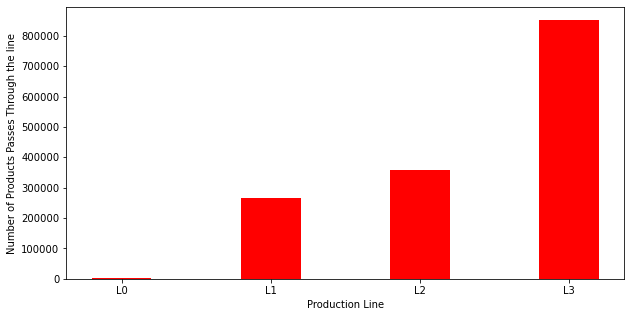

In [20]:
#showing results in bar plot for better visualization and understanding
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Number of Products Passes Through the line')
# creating the bar plot
plt.bar(diff_line, final_count_each_line, color ='red',width = 0.4)

In production line L3 a large number of products passes through it and in line L0 minimum number of products passes through it.

<BarContainer object of 4 artists>

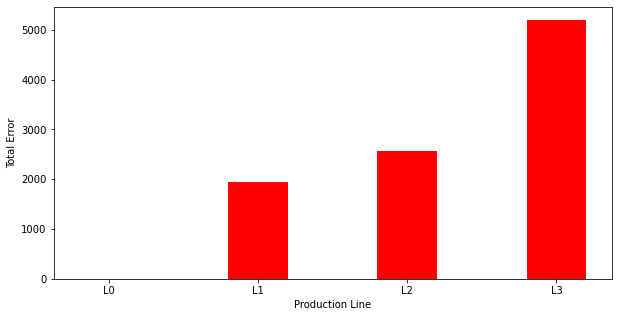

In [14]:
['S1', 'S2', 'S3', 'S4', 'S6', 'S9', 'S10', 'S11', 'S14', 'S15', 'S16', 'S18', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S35', 'S36', 'S38', 'S39', 'S42', 'S43', 'S44', 'S46', 'S47', 'S49']
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Total Error')
 
# creating the bar plot
plt.bar(diff_line, final_failure_each_line, color ='red',width = 0.4)

More the number of products passes through it more is its failure but we have to take a look of failure rate

# Q. What is the failure rate of each production line

In [10]:
#fraction_of_error = no of failure/total no of product passes through it * 100
fraction_of_error = []
for i in range(4):
    fraction_of_error.append(final_failure_each_line[i]/ final_count_each_line[i] *100)
fraction_of_error

[0.34207525655644244,
 0.7251230052569547,
 0.7212501295449262,
 0.6103851141611459]

In [ ]:
fig = plt.figure(figsize = (10, 5))
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Production Line')
plt.ylabel('Fraction of Error')
 
# creating the bar plot
plt.bar(diff_line, fraction_of_error, color ='red',width = 0.4)
fig.savefig("3.jpg")
plt.close(fig)

<BarContainer object of 4 artists>

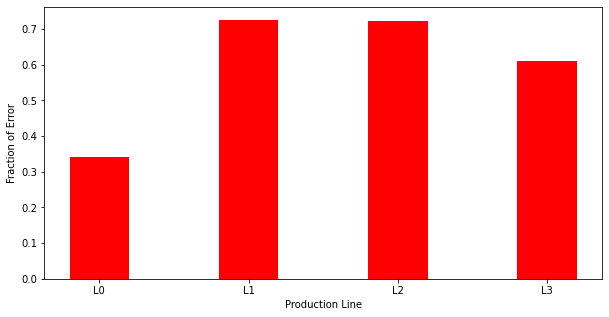

In [13]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Fraction of Error')
 
# creating the bar plot
plt.bar(diff_line, fraction_of_error, color ='red',width = 0.4)

As we can see from the above plot maximum number of products passes through the productoin line L3 but it's failure rate is not maximum
<br>
L1 is the maximum failure rate and L0 is the minimum failure rate

# Q. How many products are gone through the each stations

In [6]:
"""
Now here everything is same as above. The only difference is that instead of production line I am calculating total no of products passes through each station.
So here for categorical feature we have 34 different stations or here we are creating list of size 34 instead of 4.
"""
final_count_each_st = [0]*34
final_failure_each_st = [0]*34
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_categorical.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    columns = chunk_df.columns
    chunk_df_with_response = pd.merge(chunk_df,df_num,on = 'Id')
    no_of_product = []
    no_of_failure = []
    for st_name in diff_st:
        count = 0
        fail = 0
        l = []
        for col in columns:
            col_lst = col.split("_")
            if st_name in col_lst:
                l.append(col)
        l.append("Response")

        df_ = chunk_df_with_response[l[:-1]]
        df__ = chunk_df_with_response[l]
        for j in range(len(df_)):
            c = df_.iloc[j]
            for i in c:
                if str(i) != 'nan':
                    count += 1
                    if df__['Response'][j] == 1:
                        fail += 1
                    break
        no_of_product.append(count)
        no_of_failure.append(fail)
        
    for i in range(34):
        final_count_each_st[i] += no_of_product[i]
        final_failure_each_st[i] += no_of_failure[i]
        
print(final_count_each_st)
print(final_failure_each_st)

119it [2:05:58, 63.52s/it]

[27, 263, 0, 123, 7, 496, 503, 6, 68, 1, 77, 0, 107, 80, 0, 183727, 83648, 227011, 120729, 9583, 785437, 16, 7, 21588, 61, 1, 3, 3, 15, 283, 2093, 1, 59955, 43]
[0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1521, 421, 1695, 822, 67, 4571, 0, 0, 1087, 10, 0, 1, 0, 0, 0, 14, 0, 304, 7]


<BarContainer object of 34 artists>

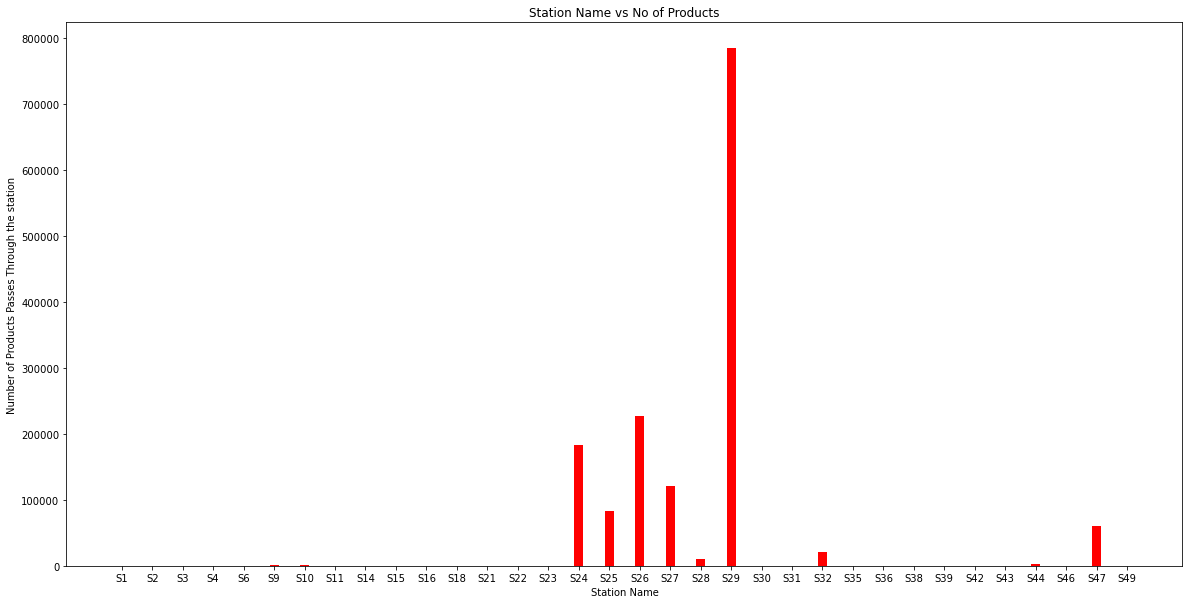

In [7]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Number of Products Passes Through the station')
plt.title("Station Name vs No of Products")
# creating the bar plot
plt.bar(diff_st, final_count_each_st, color ='red',width = 0.3)

Here we can see that in S29 station maximum number of products are gone through it(more tha 700000) and also we can see S24 and S26 also shows a resonable height. Except these 3 stations most of the stations are under 100000 i.e most of the stations are measuring equal number of products or I can say less than 100000 number of products

<BarContainer object of 34 artists>

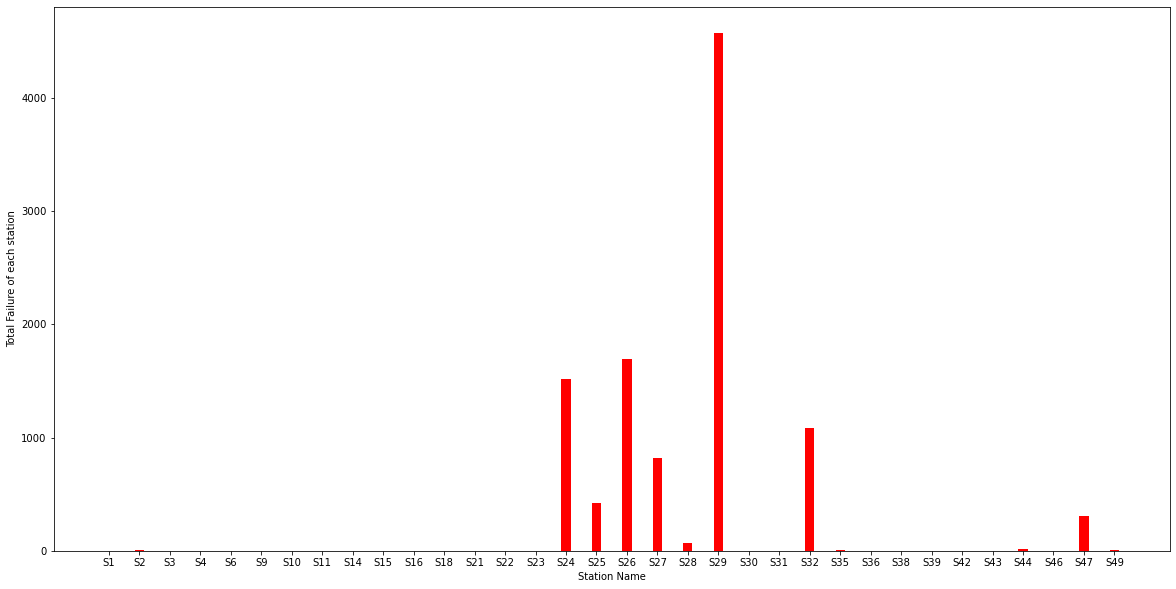

In [8]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Total Failure of each station')
# creating the bar plot
plt.bar(diff_st, final_failure_each_st, color ='red',width = 0.3)

Like in production line here also we can say that more the number of products passes through the station more it's error but we have to take a look of error rate

# Q. What is the Failure rate of each station

In [9]:
fraction_of_error_st = [] #storing all the error rate for each station
for i in range(34):
    try:
        fraction_of_error_st.append(final_failure_each_st[i]/ final_count_each_st[i] *100)
    except ZeroDivisionError: #if ther is no product passes through a station then its error rate is 0
        fraction_of_error_st.append(0) #appending the error rate
fraction_of_error_st

[0.0,
 1.1406844106463878,
 0,
 0.8130081300813009,
 0.0,
 0.4032258064516129,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0.0,
 0.0,
 0,
 0.8278587251737632,
 0.5032995409334353,
 0.7466598534872759,
 0.6808637527023333,
 0.6991547532088073,
 0.5819690185208998,
 0.0,
 0.0,
 5.0352047433759495,
 16.39344262295082,
 0.0,
 33.33333333333333,
 0.0,
 0.0,
 0.0,
 0.6688963210702341,
 0.0,
 0.5070469518805771,
 16.27906976744186]

In [10]:
len(fraction_of_error_st)

34

<BarContainer object of 34 artists>

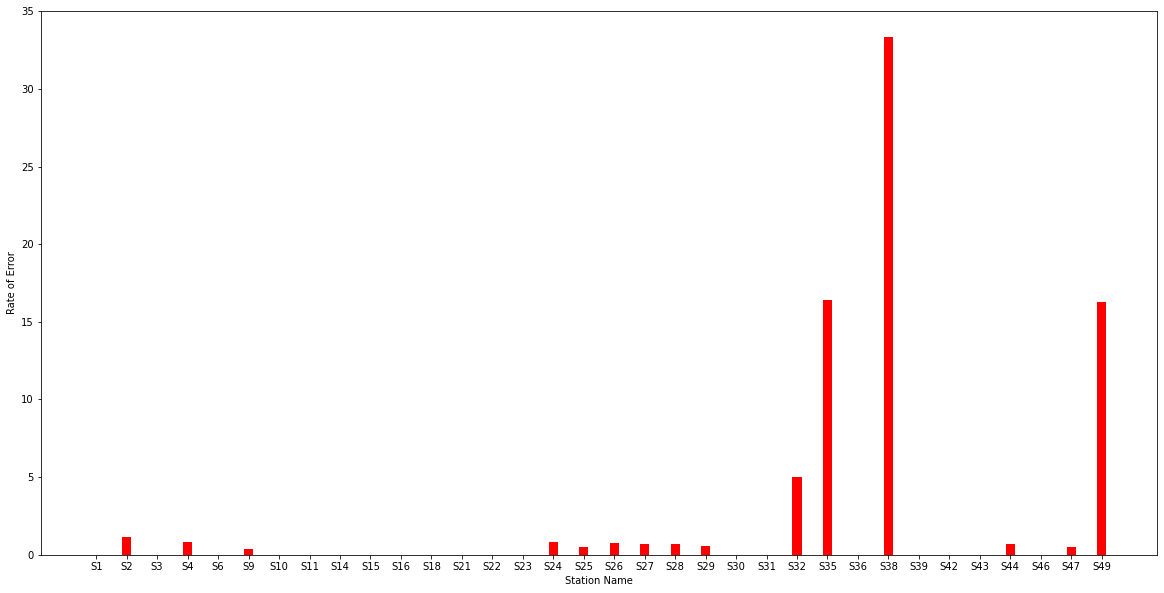

In [11]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Rate of Error')
# creating the bar plot
plt.bar(diff_st, fraction_of_error_st, color ='red',width = 0.3)

In [78]:
df.columns

Index(['Id', 'L0_S1_F25', 'L0_S1_F27', 'L0_S1_F29', 'L0_S1_F31', 'L0_S2_F33',
       'L0_S2_F35', 'L0_S2_F37', 'L0_S2_F39', 'L0_S2_F41',
       ...
       'L3_S49_F4225', 'L3_S49_F4227', 'L3_S49_F4229', 'L3_S49_F4230',
       'L3_S49_F4232', 'L3_S49_F4234', 'L3_S49_F4235', 'L3_S49_F4237',
       'L3_S49_F4239', 'L3_S49_F4240'],
      dtype='object', length=2141)

In [83]:
l = []
for i in df.columns:
    lst = i.split("_")
    if 'L2' in lst and 'S35' in lst:
        l.append(i)
l

[]

As we can see from the above plot that in S29 station there is a large number of products passes through it but it's error rate is vey low (less than 0.5%)
<br>
But in station S38,S49 and S35 the error rate is high.
<br>
The reason why S38 failure rate is high because only 3 no of product passes through it out of which 1 is showing failure. So it's failure rate is high
<br>
Except these 3 rest stations error rate is less than 0.5% which is a good thing

# What is the percentage of nan values in categorical features

In [17]:
len(columns)

2141

In [27]:
l = pd.Series([1,2,3,4])
l.count()

4

In [28]:
total_nan_values = [0]*len(columns[1:])
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_categorical.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    nan_values = []
    for col_name in columns[1:]:
        n = 0
        col = chunk_df[col_name]
        n = len(col)-col.count()
        nan_values.append(n)
    for i in range(len(total_nan_values)):
        total_nan_values[i] += nan_values[i]

119it [02:51,  1.44s/it]


In [31]:
total_per_nan_values = []
for i in total_nan_values:
    percent_nan_val = i/len(df_num)*100
    total_per_nan_values.append(percent_nan_val)
total_per_nan_values

[99.9978880622295,
 99.9978880622295,
 99.99771910720787,
 99.99771910720787,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 99.97778241465448,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.98960926616921,
 99.99383314171017,
 99.98960926616921,
 99.99400209673182,
 99.99763462969705,
 99.99400209673182,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.99940865742425,
 99.95818363214437,
 99.99298836660199,
 99.95809915463354,
 99.95978870484994,
 99.99324179913445

In [32]:
per_nan_values_ = dict()
for i in range(len(columns[1:])):
    per_nan_values_[columns[1:][i]] = total_per_nan_values[i]
per_nan_values_

{'L0_S1_F25': 99.9978880622295,
 'L0_S1_F27': 99.9978880622295,
 'L0_S1_F29': 99.99771910720787,
 'L0_S1_F31': 99.99771910720787,
 'L0_S2_F33': 99.97778241465448,
 'L0_S2_F35': 99.97778241465448,
 'L0_S2_F37': 99.97778241465448,
 'L0_S2_F39': 99.97778241465448,
 'L0_S2_F41': 99.97778241465448,
 'L0_S2_F43': 99.97778241465448,
 'L0_S2_F45': 99.97778241465448,
 'L0_S2_F47': 99.97778241465448,
 'L0_S2_F49': 99.97778241465448,
 'L0_S2_F51': 99.97778241465448,
 'L0_S2_F53': 99.97778241465448,
 'L0_S2_F55': 99.97778241465448,
 'L0_S2_F57': 99.97778241465448,
 'L0_S2_F59': 99.97778241465448,
 'L0_S2_F61': 99.97778241465448,
 'L0_S2_F63': 99.97778241465448,
 'L0_S2_F65': 99.97778241465448,
 'L0_S2_F67': 99.97778241465448,
 'L0_S3_F69': 100.0,
 'L0_S3_F71': 100.0,
 'L0_S3_F73': 100.0,
 'L0_S3_F75': 100.0,
 'L0_S3_F77': 100.0,
 'L0_S3_F79': 100.0,
 'L0_S3_F81': 100.0,
 'L0_S3_F83': 100.0,
 'L0_S3_F85': 100.0,
 'L0_S3_F87': 100.0,
 'L0_S3_F89': 100.0,
 'L0_S3_F91': 100.0,
 'L0_S3_F93': 100.0,
 'L

In [33]:
min(per_nan_values_, key=per_nan_values_.get)

'L3_S29_F3317'

In [34]:
per_nan_values_['L3_S29_F3317']

33.648237334498

In [35]:
len(total_per_nan_values)

2140

In [36]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Feature Name')
plt.ylabel('% of nan values')
# creating the bar plot
plt.bar(columns[1:], total_per_nan_values, color ='red',width = 0.3)
fig.savefig("img.jpg")
plt.close(fig)

<BarContainer object of 2140 artists>

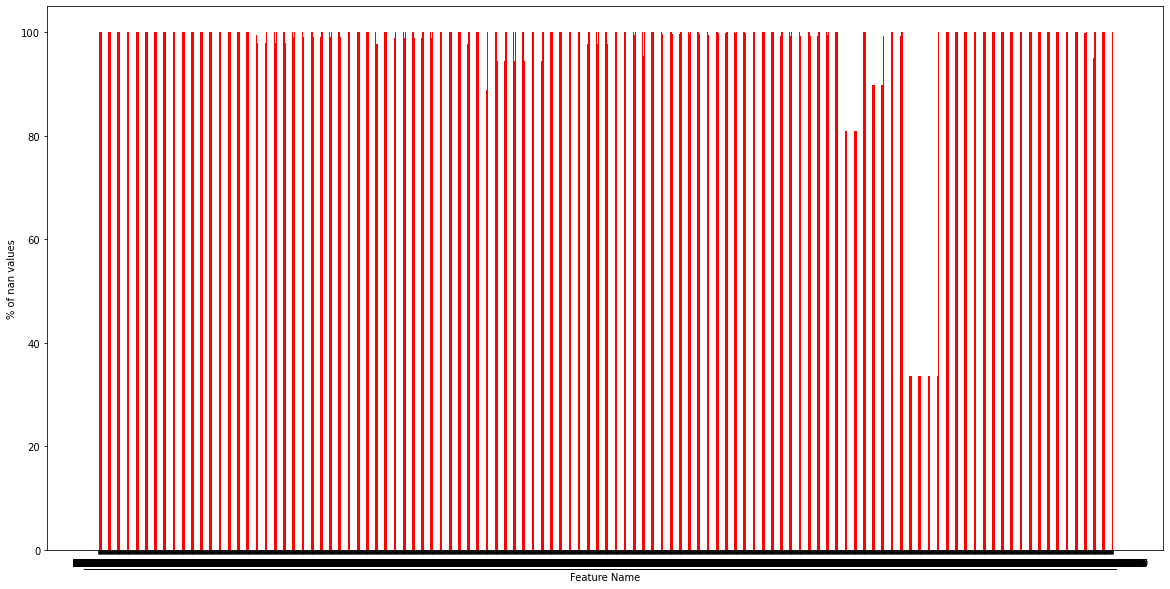

In [60]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Feature Name')
plt.ylabel('% of nan values')
# creating the bar plot
plt.bar(columns[1:], total_per_nan_values, color ='red',width = 0.3)

As we can se from the above plot that most of the values are more than 99%. So I can say that the percentage of nan values are 100% for some feature and more than 99% for maximum feature.
<br>
There are only a few feature like L3_S29_F3317 whose nan values are less than 50%. 
<br>
So may be this type of feature are important feature for us

# EDA on Numerical Features

In [5]:
df_num_ = pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_numeric.csv.zip',compression='zip',nrows=5000)
df_num_.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Q. What is the Total Number of Production Lines and Stations are used in this Numerical Features

In [6]:
nume_columns = df_num_.columns
nume_columns

Index(['Id', 'L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8',
       'L0_S0_F10', 'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16',
       ...
       'L3_S50_F4245', 'L3_S50_F4247', 'L3_S50_F4249', 'L3_S50_F4251',
       'L3_S50_F4253', 'L3_S51_F4256', 'L3_S51_F4258', 'L3_S51_F4260',
       'L3_S51_F4262', 'Response'],
      dtype='object', length=970)

In [40]:
diff_num_line = []
diff_num_st = []
diff_num_fn = []
nume_feature = nume_columns[1:len(nume_columns)-1]
for i in range(1,len(nume_columns)-1):
    feature = nume_columns[i]
    lst = feature.split("_")
    line = lst[0]
    st = lst[1]
    fn = lst[2]
    
    if line not in diff_num_line:
        diff_num_line.append(line)
    if st not in diff_num_st:
        diff_num_st.append(st)
    if fn not in diff_num_fn:
        diff_num_fn.append(fn)
print(diff_num_line)
print(len(diff_num_line))
print(diff_num_st)
print(len(diff_num_st))
#print(diff_num_fn)
print(len(diff_num_fn))

['L0', 'L1', 'L2', 'L3']
4
['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S43', 'S44', 'S45', 'S47', 'S48', 'S49', 'S50', 'S51']
50
968


In [41]:
print(len(nume_columns))

970


Like in categorical feature, in numerical feature here also total 4 production lines are there like in categorical feature but there are 50 stations (except S42) are present with 968 feature number.

# Q. Dataset is balanced or Imbalanced

In [43]:
total_zero  = 0 #calculating total rows of class 0
total_one = 0 #calculating total rows of class 1
for chunk_df_num in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_numeric.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    zero,one = pd.value_counts(chunk_df_num["Response"].values, sort=False)[0], pd.value_counts(chunk_df_num["Response"].values, sort=False)[1]
    total_zero += zero
    total_one += one
print(total_zero,total_one)

119it [01:08,  1.74it/s]

1176868 6879


In [8]:
total_zero,total_one = 1176868, 6879

In [13]:
lst = list((total_zero,total_one))
name = ['0','1']
fig, axe = plt.subplots(dpi=800)
plt.ylabel('No of Classes ')
plt.xlabel('Class Name')
plt.title('Target Count')
 
# creating the bar plot
plt.bar(name, lst,width = 0.3,color = ['blue','red'])
fig.savefig("1.jpg")
plt.close(fig)

In [47]:
print(f"% of Response = 1 is equato {total_one/(total_zero+total_one)*100}")

% of Response = 1 is equato 0.581120796927046


<BarContainer object of 2 artists>

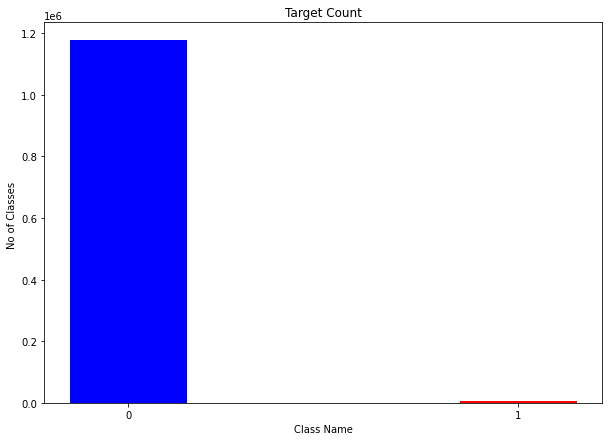

In [48]:
lst = list((total_zero,total_one))
name = ['0','1']
fig = plt.figure(figsize = (10, 7))
plt.ylabel('No of Classes ')
plt.xlabel('Class Name')
plt.title('Target Count')
 
# creating the bar plot
plt.bar(name, lst,width = 0.3,color = ['blue','red'])

From the above plot I can see that the dataset is highly imbalanced like almost 99.5% dataset are like not facing any internal failure in future

# Q. What is the no of measurements present in each production line

In [42]:
no_of_measurment = []
for line in diff_num_line: #iterating every feature in numerical dataset
    l = []
    c = 0
    for col in nume_columns:
        if line in col:
            l.append(col) #if corresponding production line name is present in the list of feature name then append that feature
    df_num__ = df_num_[l]
    no_of_measurment.append(len(df_num__.columns))
no_of_measurment

[168, 513, 42, 245]

In [43]:
np.sum(no_of_measurment)

968

In [44]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Production Line')
plt.ylabel('Total Number of Measurements')
 
# creating the bar plot
plt.bar(diff_num_line, no_of_measurment, color ='green',width = 0.4)
fig.savefig("img.jpg")
plt.close(fig)

<BarContainer object of 4 artists>

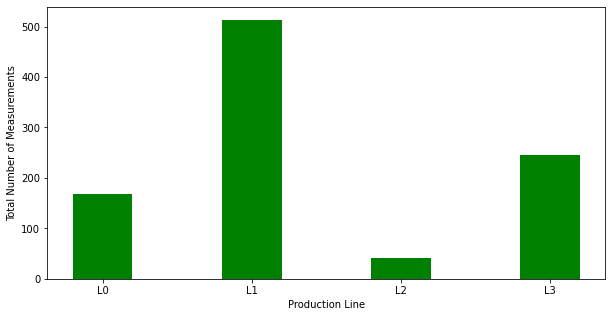

In [46]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Total Number of Measurements')
 
# creating the bar plot
plt.bar(diff_num_line, no_of_measurment, color ='green',width = 0.4)

We can see from above plot that maximum number of measurements present in L1 and minimum number of measurements present in L2

# Q.What is the no of measurements present in each station

In [45]:
no_of_measurment_st = []
for line in tqdm(diff_num_st): #iterating every feature in numerical dataset
    l = []
    c = 0
    for col in nume_columns:
        col_list = col.split("_") #spliting the feature name and storing it in a list
        if line in col_list:
            l.append(col) #if corresponding statioin name is present in the list of feature name then append that feature
    df_num__ = df_num_[l]
    no_of_measurment_st.append(len(df_num__.columns))

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 609.66it/s]


In [46]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Station Name')
plt.ylabel('Total Number of Measurements')
 
# creating the bar plot
plt.bar(diff_num_st, no_of_measurment_st, color ='green',width = 0.3)
fig.savefig("1.jpg")
plt.close(fig)

<BarContainer object of 50 artists>

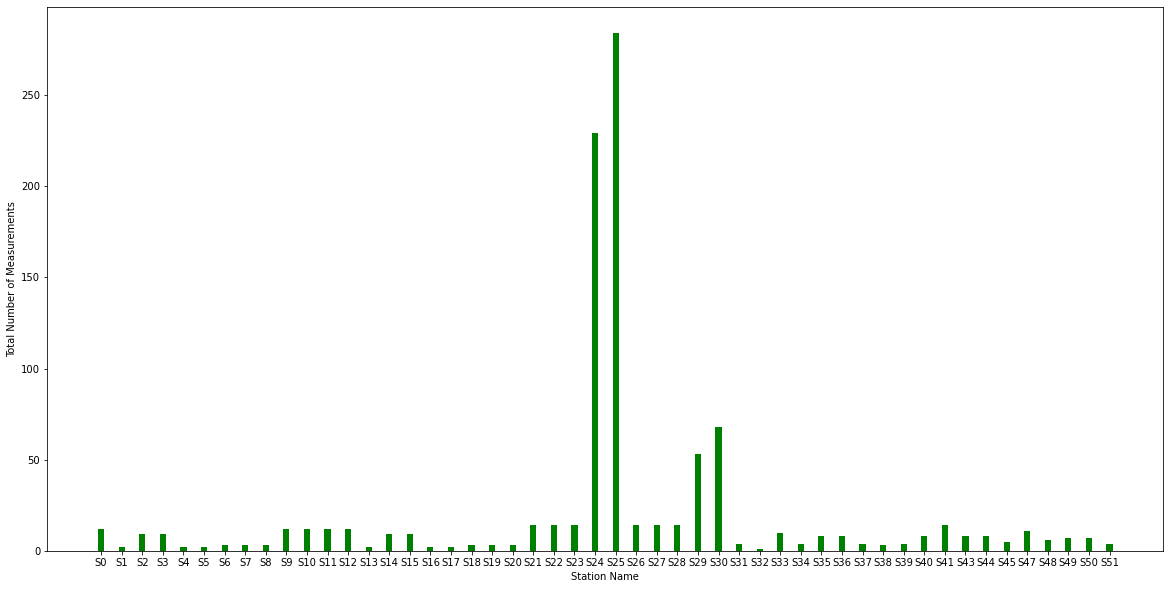

In [15]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Total Number of Measurements')
 
# creating the bar plot
plt.bar(diff_num_st, no_of_measurment_st, color ='green',width = 0.3)

From the above plot we can see that station S24 and S25 has the maximum number of measurements like more than 200 and S29,S30 also get a resonable heigh i.e more than 50.Rest stations no of measurements i can say that are under 50

# Q. What is the Error rate of each station in Numerical Feature

In [7]:
"""
Here also all the codes are same except for categorical feature we are doing for numerical feature.
"""

#creating list of counting no of products passes through it and total no of failures for all 51 stations.
final_count_each_st = [0]*len(diff_num_st)
final_failure_each_st = [0]*len(diff_num_st)

for chunk_df_with_response in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_numeric.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    columns = chunk_df_with_response.columns
    no_of_product = []
    no_of_failure = []
    for st_name in diff_num_st:
        count = 0
        fail = 0
        l = []
        for col in columns:
            col_lst = col.split("_")
            if st_name in col_lst:
                l.append(col)
        l.append("Response")

        df_ = chunk_df_with_response[l[:-1]]
        df__ = chunk_df_with_response[l]
        for j in range(len(df_)):
            c = df_.iloc[j]
            for i in c:
                if str(i) != 'nan':
                    count += 1
                    if df__['Response'].values[j] == 1:
                        fail += 1
                    break
        no_of_product.append(count)
        no_of_failure.append(fail)
        
    for i in range(len(diff_num_st)):
        final_count_each_st[i] += no_of_product[i]
        final_failure_each_st[i] += no_of_failure[i]
        
print(final_count_each_st)
print(final_failure_each_st)

119it [47:37, 24.01s/it]

[673862, 673904, 339774, 334708, 335295, 339512, 338988, 335698, 673881, 225678, 224540, 225452, 242061, 242065, 120625, 121445, 119139, 123027, 121081, 121027, 242111, 81409, 80599, 80290, 183727, 83658, 227011, 120729, 9583, 1119629, 1119811, 39003, 24543, 1114695, 1115118, 552108, 569032, 1120394, 27142, 59908, 59914, 59913, 30551, 29804, 59932, 59955, 59923, 29673, 30359, 59853]
[3608, 3606, 1817, 1792, 1800, 1811, 1805, 1805, 3606, 1196, 1223, 1193, 1323, 1323, 681, 640, 661, 662, 654, 669, 1323, 461, 428, 434, 1521, 424, 1695, 822, 67, 6546, 6551, 106, 1106, 5546, 5718, 3177, 3391, 6556, 212, 303, 304, 304, 159, 146, 304, 304, 303, 153, 158, 302]


<BarContainer object of 50 artists>

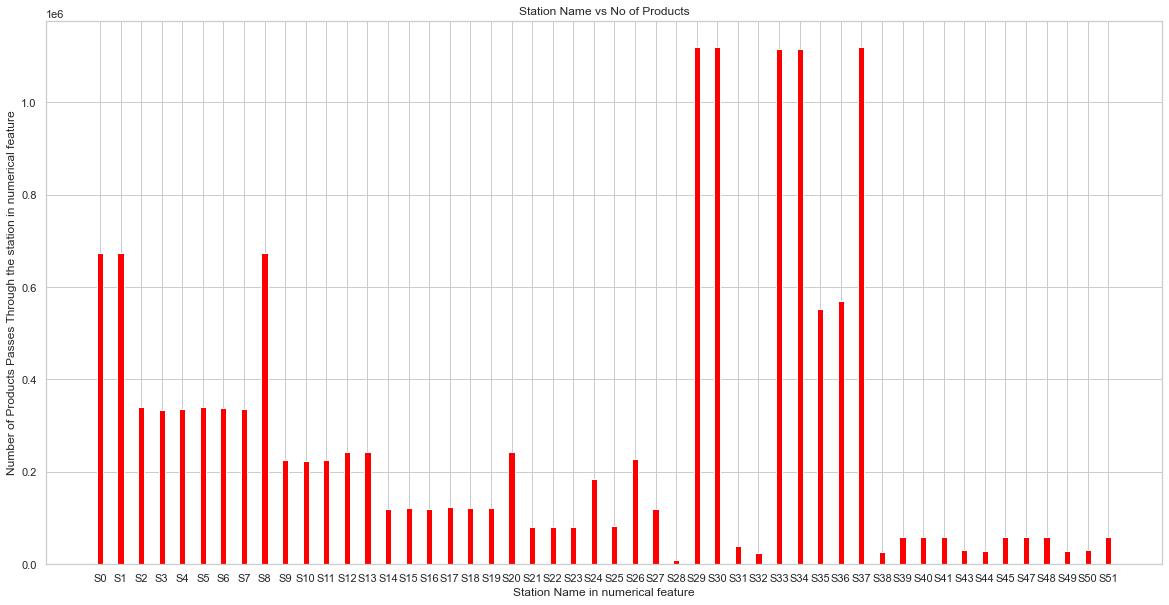

In [24]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name in numerical feature')
plt.ylabel('Number of Products Passes Through the station in numerical feature')
plt.title("Station Name vs No of Products")
# creating the bar plot
plt.bar(diff_num_st, final_count_each_st, color ='red',width = 0.3)

In our previous plot we conclude that station S24 and S25 has the maximum no of measurements but still there is less no of products passes through it.
<br>
Stations like S29 and S30 also get a resonalble height in the previous plot and here also the no of products passes through it is maximum.
<br>
Stations like S33, S34 and S37 less than 50 measurements are present but still a large number of prducts are passes through it.

<BarContainer object of 50 artists>

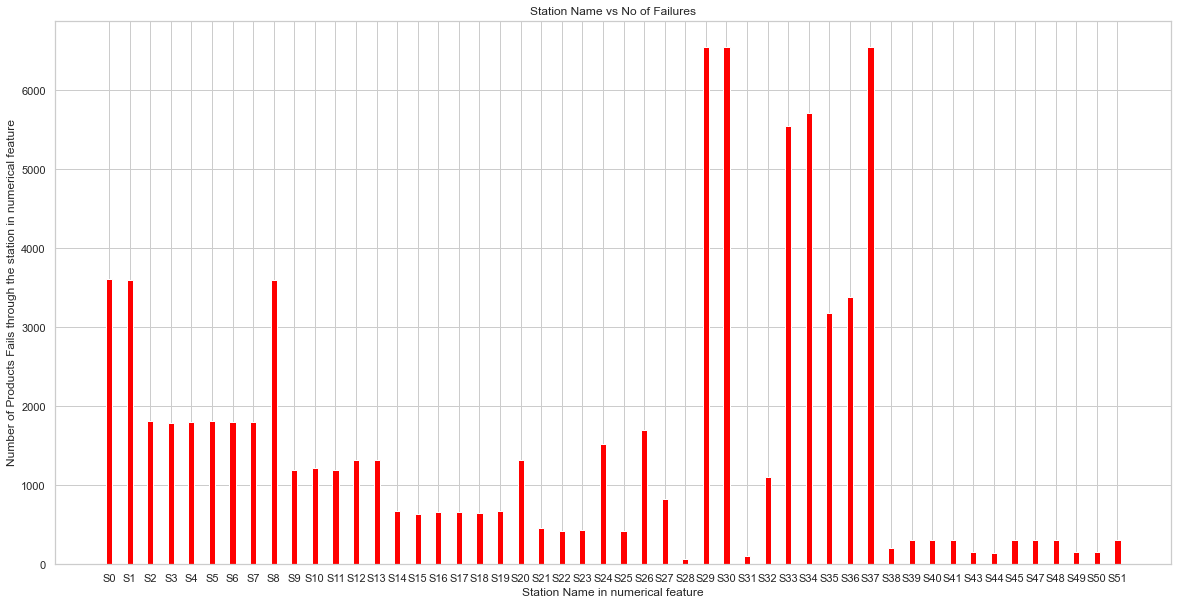

In [29]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name in numerical feature')
plt.ylabel('Number of Products Fails through the station in numerical feature')
plt.title("Station Name vs No of Failures")
# creating the bar plot
plt.bar(diff_num_st, final_failure_each_st, color ='red',width = 0.3)

Like every plot here we can say that like more the no of products passes through it more it's error but we have to take a look on error rate

In [11]:
fraction_of_error = []
for i in range(len(diff_num_st)):
    fraction_of_error.append(final_failure_each_st[i]/ final_count_each_st[i] *100)
fraction_of_error

[0.5354211989992017,
 0.5350910515444336,
 0.5347672276277762,
 0.5353920432137863,
 0.5368406925244934,
 0.5334126628808407,
 0.5324672259785007,
 0.5376856579425555,
 0.5351093145525694,
 0.5299586135999078,
 0.5446691012737152,
 0.5291592001845182,
 0.5465564465155478,
 0.5465474149505298,
 0.564559585492228,
 0.5269875252171765,
 0.5548141246778973,
 0.5380932640802426,
 0.540134290268498,
 0.552769216786337,
 0.5464435734022824,
 0.5662764559201071,
 0.5310239581136242,
 0.5405405405405406,
 0.8278587251737632,
 0.5068254082096153,
 0.7466598534872759,
 0.6808637527023333,
 0.6991547532088073,
 0.584657953661436,
 0.5850094346278077,
 0.2717739661051714,
 4.506376563582284,
 0.4975352002117171,
 0.5127708457759627,
 0.5754308939555305,
 0.5959243065416355,
 0.5851512949908693,
 0.7810772971778056,
 0.5057755224677839,
 0.5073939313015321,
 0.5074024001468797,
 0.520441229419659,
 0.48986713192860015,
 0.5072415404124675,
 0.5070469518805771,
 0.5056489161090065,
 0.515620260843190

<BarContainer object of 50 artists>

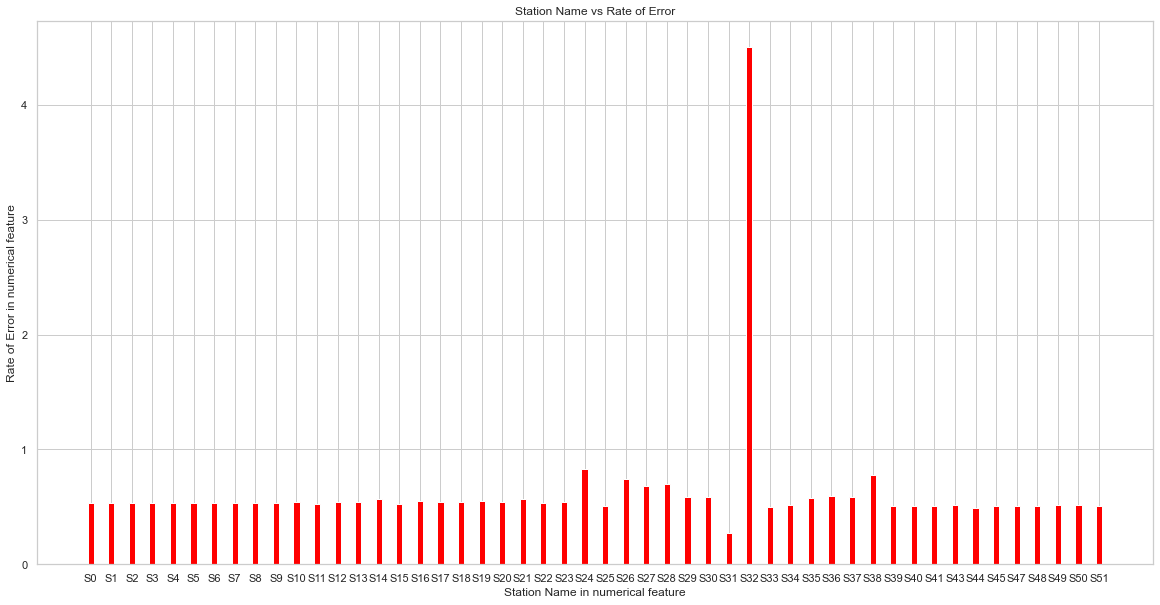

In [28]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name in numerical feature')
plt.ylabel('Rate of Error in numerical feature')
plt.title("Station Name vs Rate of Error")
# creating the bar plot
plt.bar(diff_num_st, fraction_of_error, color ='red',width = 0.3)

From the above plot we can see that station S32 is showing maximum no of error rate but also S32 has very few parts going through it
<br>
Stations like S29 and S30 contains more mo of measurements and also a large no of products passes through it but still it's error rate is not high

## Each stations have different no of measurements and each stations has different number of parts passing through it which indicates that a large no of variety of products are manufactured in the industry or I can say different classes of products each going throuhg a certain production path

# Q.Is there any Relation Between the total number of measurements a product has been gone through and its Response 

12it [17:45, 88.79s/it]


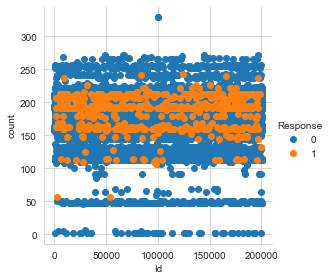

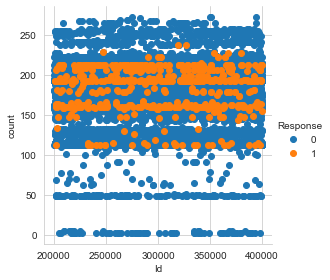

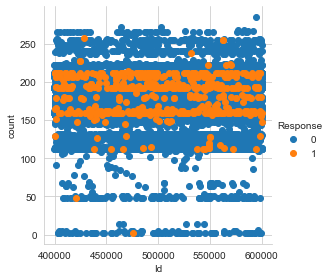

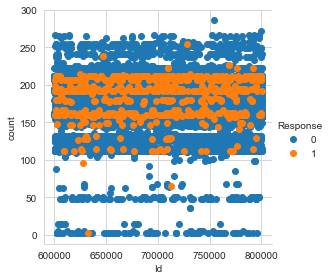

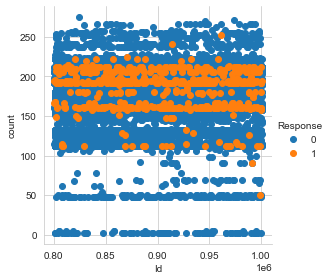

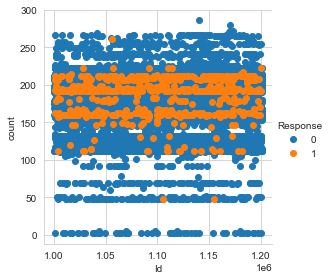

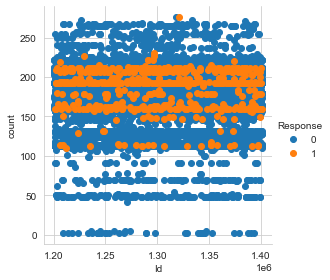

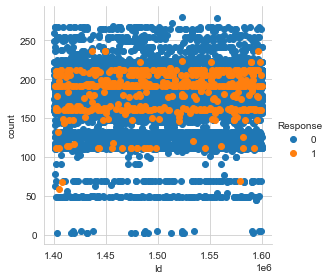

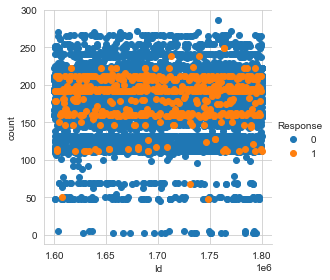

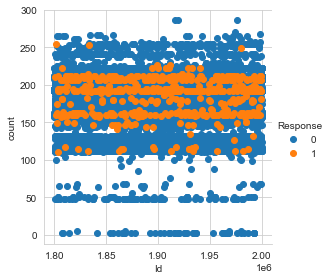

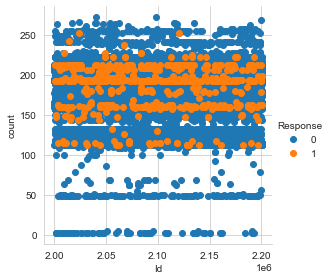

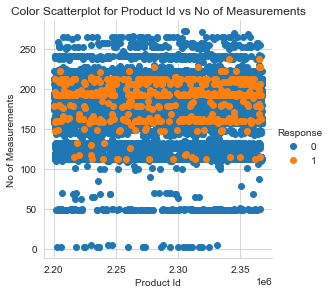

In [76]:
#here I am plotting a scatter plot to know is there any relation between total no of measurements and its response.
#I am plotting the result for every chunk in the dataset
for chunk_df_num in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_numeric.csv.zip',iterator=True, chunksize=100000,compression='zip',low_memory=False)):
    count = [] #a list to store the no of nnumerical values
    for i in range(len(chunk_df_num)):
        c = 0
        col = chunk_df_num.iloc[i]
        #counting all the numerical values in a row and appending it in the count lis
        for j in col:
            if str(j) != 'nan':
                c+=1
        count.append(c)
        
    #converting list to pandas series
    count = pd.Series(count)
    df_new = pd.DataFrame() #creating an empty dataframe
    df_new = copy.copy(chunk_df_num) #shallow copy of the chunk dataframe
    df_new['count'] = count.values #adding a new column called count to the df_new dataframe 
    
    # plotting the scatter plot with hue = Response
    sns.set_style("whitegrid");
    sns.FacetGrid(df_new, hue="Response", height=4) \
       .map(plt.scatter, "Id", "count") \
       .add_legend();
plt.ylabel("No of Measurements")
plt.xlabel("Product Id")
plt.title("Color Scatterplot for Product Id vs No of Measurements")
plt.show();

I am plotting the scatterplot between count and Id number. The X axis is not important for us as it is just an Id number. In the above plot we care about the Response and the coung (Y-axis).
<br>
We can see clearly see from the above plot that almost all the points are blue or class = 0 when the count is less that 150 and greater than 220.
<br>
There is a large no of orange points are present in between the range 100 to 220

# Q.What is the % of nan values of numerical feature

In [8]:
total_nan_values_nume = [0]*len(nume_columns[1:])
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_numeric.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    nan_values = []
    for col_name in nume_columns[1:]:
        n = 0
        col = chunk_df[col_name]
        n = len(col) - col.count()
        nan_values.append(n)
    for i in range(len(total_nan_values_nume)):
        total_nan_values_nume[i] += nan_values[i]

119it [01:06,  1.78it/s]


In [11]:
total_per_nan_values_nume = []
for i in total_nan_values_nume:
    percent_nan_val = i/len(df_num)*100
    total_per_nan_values_nume.append(percent_nan_val)
total_per_nan_values_nume

[43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07043650374616,
 43.070267548724516,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.67511300979011,
 71.6795058403527,
 71.31887134666445,
 71.31887134666445,
 71.36313756233385,
 71.36313756233385,
 71.36313756233385,
 71.64106857292985,
 71.64106857292985,
 71.64106857292985,
 43.07221053147337,
 43.07221053147337,
 43.07221053147337,
 80.9368893859921,
 80.93528431328653,
 80.93587565586228,
 80.93528431328653,
 80.9368893859921,
 8

In [12]:
per_nan_values_nume_ = dict()
for i in range(len(nume_columns[1:-1])):
    per_nan_values_nume_[nume_columns[1:-1][i]] = total_per_nan_values_nume[i]
per_nan_values_nume_

{'L0_S0_F0': 43.07381560417893,
 'L0_S0_F2': 43.07381560417893,
 'L0_S0_F4': 43.07381560417893,
 'L0_S0_F6': 43.07381560417893,
 'L0_S0_F8': 43.07381560417893,
 'L0_S0_F10': 43.07381560417893,
 'L0_S0_F12': 43.07381560417893,
 'L0_S0_F14': 43.07381560417893,
 'L0_S0_F16': 43.07381560417893,
 'L0_S0_F18': 43.07381560417893,
 'L0_S0_F20': 43.07381560417893,
 'L0_S0_F22': 43.07381560417893,
 'L0_S1_F24': 43.07043650374616,
 'L0_S1_F28': 43.070267548724516,
 'L0_S2_F32': 71.29673823882975,
 'L0_S2_F36': 71.29673823882975,
 'L0_S2_F40': 71.29673823882975,
 'L0_S2_F44': 71.29673823882975,
 'L0_S2_F48': 71.29673823882975,
 'L0_S2_F52': 71.29673823882975,
 'L0_S2_F56': 71.29673823882975,
 'L0_S2_F60': 71.29673823882975,
 'L0_S2_F64': 71.29673823882975,
 'L0_S3_F68': 71.72470130864113,
 'L0_S3_F72': 71.72470130864113,
 'L0_S3_F76': 71.72470130864113,
 'L0_S3_F80': 71.72470130864113,
 'L0_S3_F84': 71.72470130864113,
 'L0_S3_F88': 71.72470130864113,
 'L0_S3_F92': 71.72470130864113,
 'L0_S3_F96': 

In [13]:
min(per_nan_values_nume_, key=per_nan_values_nume_.get)

'L3_S37_F3944'

In [14]:
min(per_nan_values_nume_.values())

5.351903742945072

In [15]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Feature Name')
plt.ylabel('% of nan values in nunerical feature')
# creating the bar plot
plt.bar(nume_columns[1:], total_per_nan_values_nume, color ='red',width = 0.3)
fig.savefig("img.jpg")
plt.close(fig)

<BarContainer object of 969 artists>

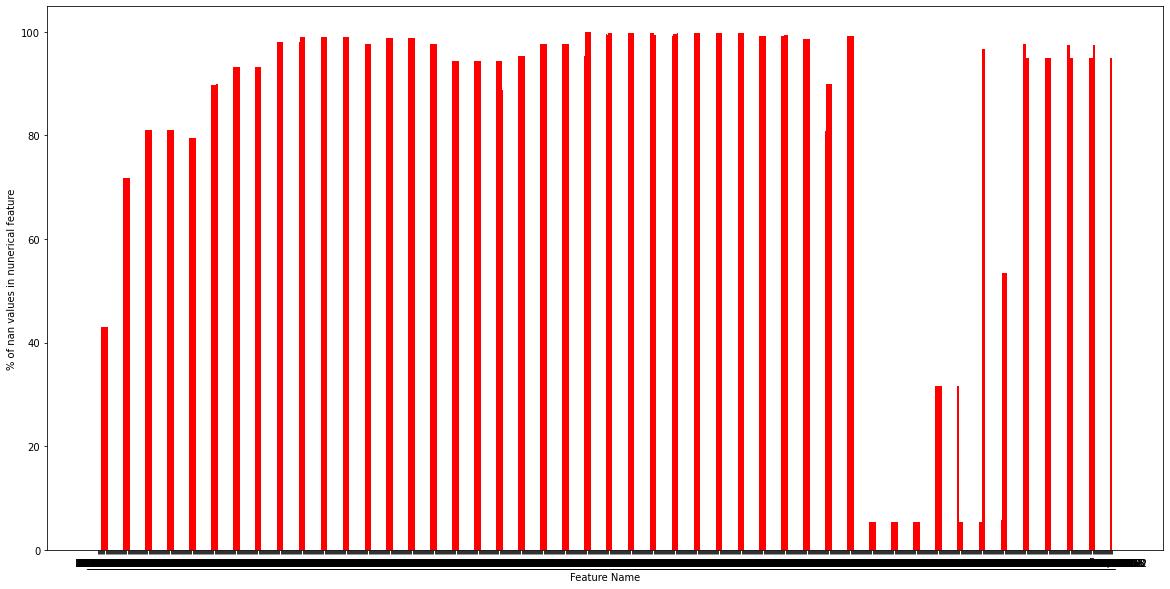

In [77]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Feature Name')
plt.ylabel('% of nan values in nunerical feature')
# creating the bar plot
plt.bar(nume_columns[1:], total_per_nan_values_nume, color ='red',width = 0.3)

First of all there is not nan values in response column that's why we don't see any bar at the end of the plot in right hand side.
<br>
Features like L3_S37_F3944 has a very less no of nan valus(less than 6%)
<br>
If we compare the % of nan values in categorical to numerical then we can easily say that numerical feature has less no of nan values but still 90% features are almost more than 80% of nan values

# EDA on Date Feature

In [25]:
df_date = pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv',nrows=1000)
df_date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Overview

In [26]:
diff_line_date = [] #store all the different production lines
diff_st_date = [] #store all the different stations
diff_time = [] #store all the different feature number
columns_date = df_date.columns
for i in range(1,len(columns_date)): #iterating every column except Id
    feature = columns_date[i]
    lst = feature.split("_") #spliting the feature name into line,station and feature number name 
    
    #storing line,station and feature number name in different variable
    line = lst[0]
    st = lst[1]
    fn = lst[2]
    
    if line not in diff_line_date: #selecting different production line 
        diff_line_date.append(line)
    if st not in diff_st_date: #selecting different stations
        diff_st_date.append(st)
    if fn not in diff_time: #selecting different feature number
        diff_time.append(fn)
print(diff_line_date)
print(len(diff_line_date))
print(diff_st_date)
print(len(diff_st_date))
#print(diff_time)
print(len(diff_time))

['L0', 'L1', 'L2', 'L3']
4
['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51']
52
1156


Like categorical and numerical here also there are total 4 different production lines are present but here total 52 stations and 1156 different time are there.

In [34]:
total_time = [] #time difference for each and every row
total_time_0 = [] #time difference for only class 0
total_time_1 = [] #time difference for only class 1
for chunk_df_date in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    columns_date = chunk_df_date.columns #all the columns of date feature
    chunk_df_date_with_response = pd.merge(chunk_df_date,df_num,on='Id') #adding the Response column based on Id
    for i in range(len(chunk_df_date)): #iterating every row of the dataframe
        row = chunk_df_date_with_response.iloc[i][1:len(columns_date)-1]
        val = []
        for j in row: #for every element in the row
            if str(j) != 'nan':
                val.append(j) #appending everything except nan values
        if len(val) != 0: 
            time_diff = max(val) - min(val) #calculating time difference
        else:
            time_diff = 0 #if all the values of any row is nan then it's time difference is zero
        total_time.append(time_diff)
        if chunk_df_date_with_response['Response'].values[i] == 0: #only iterating those rows whose class is 0
            total_time_0.append(time_diff)
        if chunk_df_date_with_response['Response'].values[i] == 1: #only iteratng those rows whose class is 1
            total_time_1.append(time_diff)

119it [21:25, 10.80s/it]


In [35]:
lst = [25,50,75,90,99] #list of percentiles
for i in lst:
    print(f"{i}th percentile value for class 0 is {np.round(np.percentile(total_time_0,i),3)} and for class 1 is {np.round(np.percentile(total_time_1,i),3)}")

25th percentile value for class 0 is 1.71 and for class 1 is 1.95
50th percentile value for class 0 is 3.69 and for class 1 is 4.93
75th percentile value for class 0 is 11.75 and for class 1 is 16.305
90th percentile value for class 0 is 35.09 and for class 1 is 42.552
99th percentile value for class 0 is 62.9 and for class 1 is 72.39


In [36]:
df['total_time'] = total_time
df.head()

NameError: name 'df' is not defined

In [37]:
df_date_with_response = pd.DataFrame()
df_date_with_response['total_time'] = total_time
df_date_with_response['Response'] = df_num['Response']
df_date_with_response.head()

,total_time,Response
0,5.05,0
1,2.63,0
2,5.72,0
3,4.96,0
4,3.38,0


In [38]:
df_date_with_response.shape

(1183747, 2)

In [39]:
fig, axe = plt.subplots(dpi=800)
sns.set_theme(style="whitegrid")
sns.boxplot(x='Response',y='total_time',data=df_date_with_response)
fig.savefig("img.jpg")
plt.close(fig)

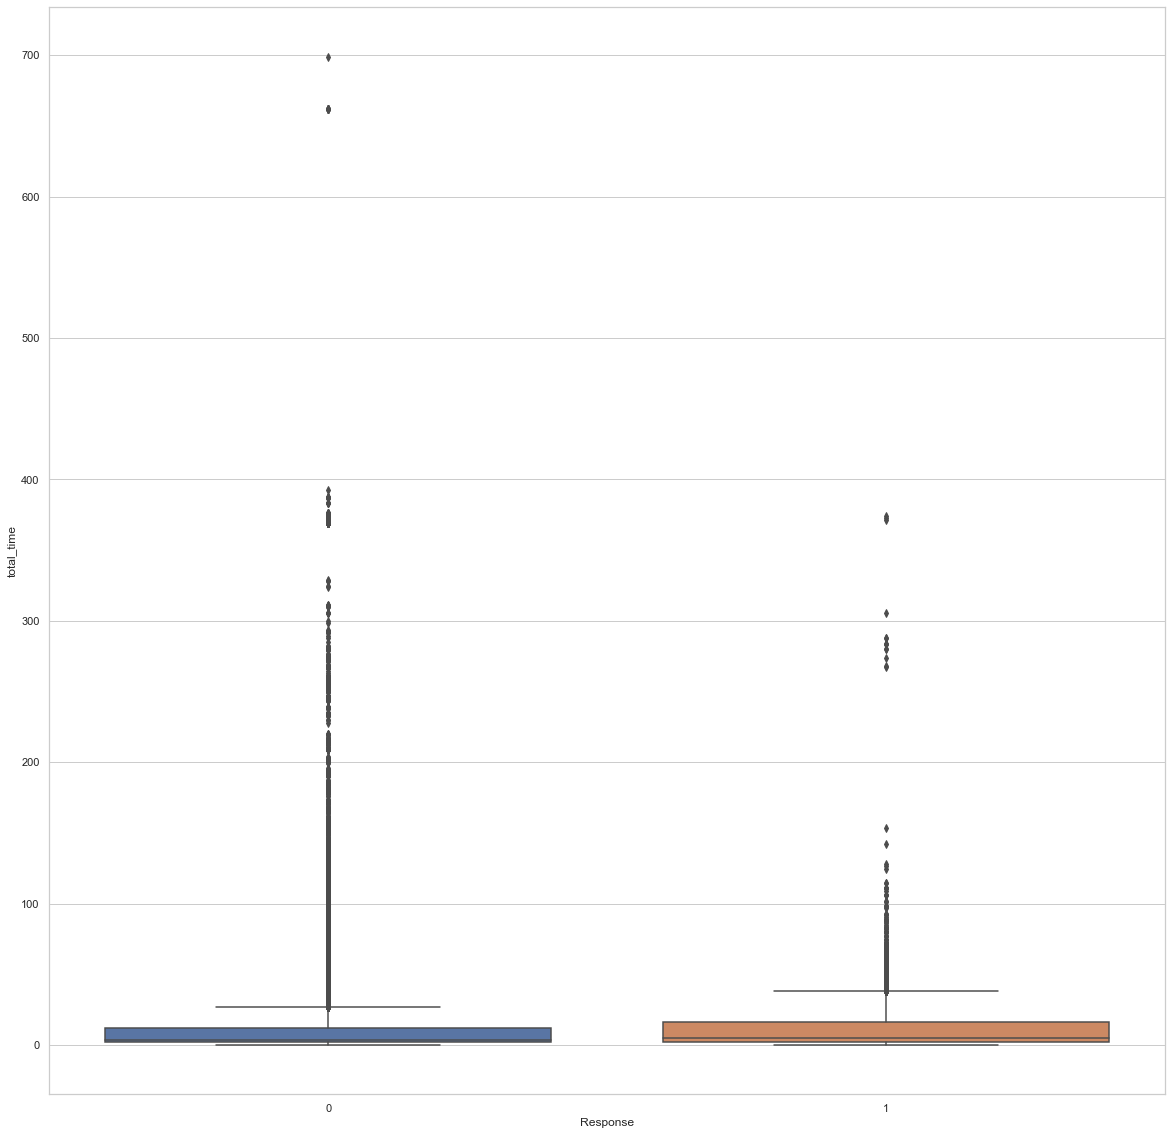

In [69]:
fig = plt.figure(figsize = (20, 20))
sns.set_theme(style="whitegrid")
sns.boxplot(x='Response',y='total_time',data=df_date_with_response)
plt.show()

From the above boxplot we can say that the values of the class 1 is higher in comparision to class 0. 
<br>
We can clearly see from above boxplot that both 50th and 75th percentile are higher in class 1 as we already seen it before
<br>
in class 0 maximum values are present under 60 time difference so I can say that like the points are well concentrated.

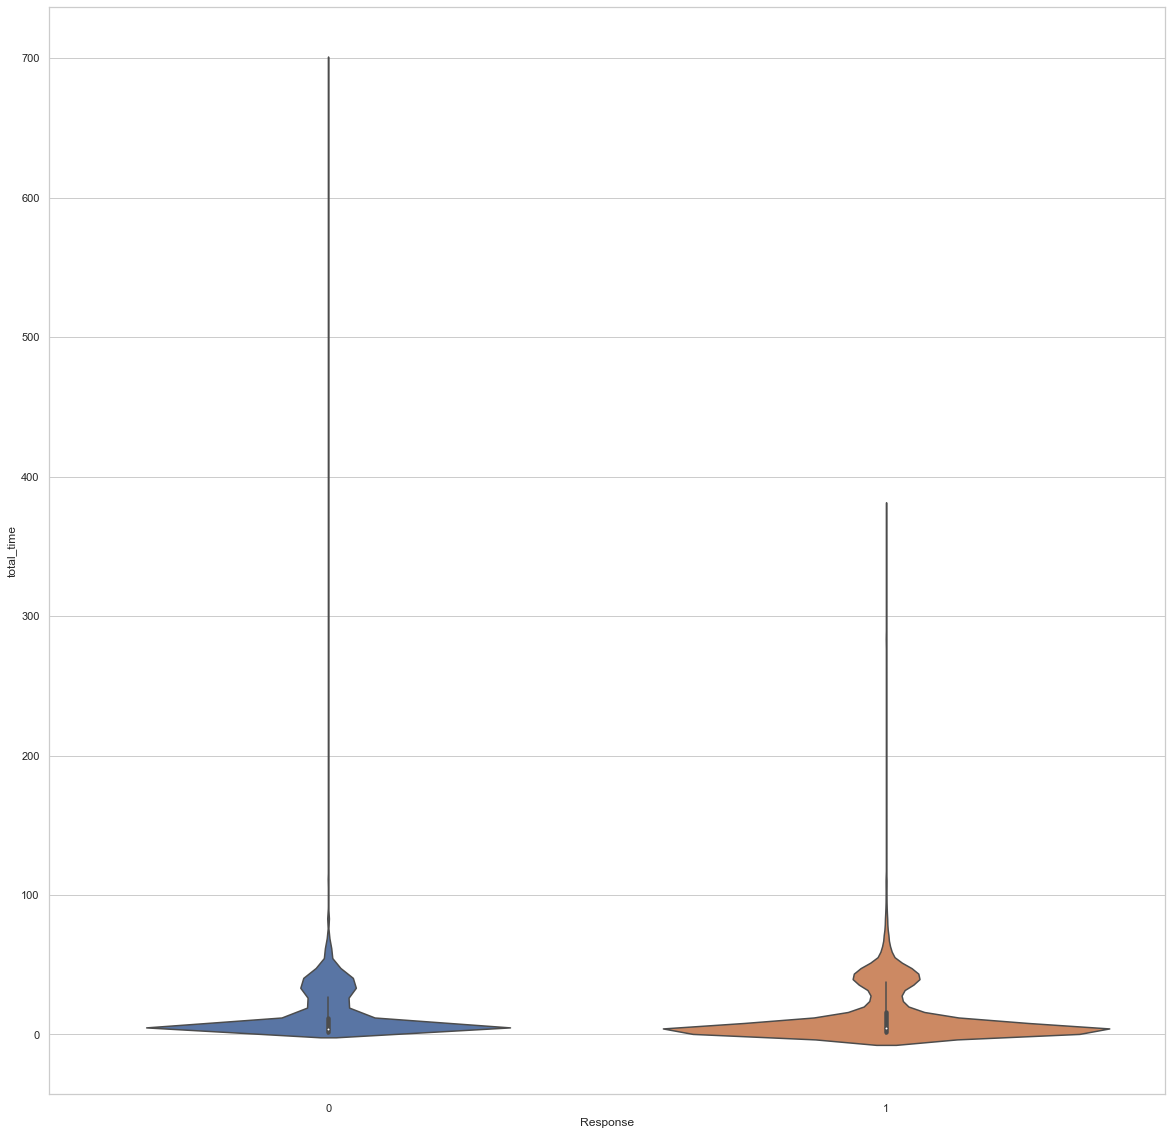

In [70]:
fig = plt.figure(figsize = (20, 20))
sns.set_theme(style="whitegrid")
sns.violinplot(x='Response',y='total_time',data=df_date_with_response)
plt.show()

The thick black line is nothing but the boxplt and the curve surrounding it is pdf.
<br>
The spread of the class 1(orange plot) is slightli more in comparision to class 0

## From the above result we can say that the time difference is one of the most important feature for us to predict whether a product will show internal failur in future or not. It is expected because if the complexcity of the product increases than the time also increase. So due to it's commplexcity there is a higher chance of failure. 

# Q.What is the %of nan values in date feature

In [27]:
date_columns =df_date.columns
total_nan_values_date = [0]*len(date_columns[1:])
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    nan_values = []
    for col_name in date_columns[1:]:
        n = 0
        col = chunk_df[col_name]
        n = len(col)-col.count()
        nan_values.append(n)
    for i in range(len(total_nan_values_date)):
        total_nan_values_date[i] += nan_values[i]

119it [01:26,  1.37it/s]


In [28]:
total_per_nan_values_date = []
for i in total_nan_values_date:
    percent_nan_val = i/len(df_num)*100
    total_per_nan_values_date.append(percent_nan_val)
total_per_nan_values_date

[43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07381560417893,
 43.07043650374616,
 43.070267548724516,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.29673823882975,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.72470130864113,
 71.67511300979011,
 71.6795058403527,
 71.31887134666445,
 71.31887134666445,
 71.36313756233385,
 71.36313756233385,
 71.36313756233385,
 71.36313756233385,
 71.36313756233385,
 71.64106857292985,
 71.64106857292985,
 71.64106857292985,
 71.64106857292985,
 71.64106857292985,
 43.07221053147337,
 43.07221053147337,
 43.07221053147337,
 43.07221053147337,


In [29]:
per_nan_values_date_ = dict()
for i in range(len(date_columns[1:])):
    per_nan_values_date_[date_columns[1:][i]] = total_per_nan_values_date[i]
per_nan_values_date_

{'L0_S0_D1': 43.07381560417893,
 'L0_S0_D3': 43.07381560417893,
 'L0_S0_D5': 43.07381560417893,
 'L0_S0_D7': 43.07381560417893,
 'L0_S0_D9': 43.07381560417893,
 'L0_S0_D11': 43.07381560417893,
 'L0_S0_D13': 43.07381560417893,
 'L0_S0_D15': 43.07381560417893,
 'L0_S0_D17': 43.07381560417893,
 'L0_S0_D19': 43.07381560417893,
 'L0_S0_D21': 43.07381560417893,
 'L0_S0_D23': 43.07381560417893,
 'L0_S1_D26': 43.07043650374616,
 'L0_S1_D30': 43.070267548724516,
 'L0_S2_D34': 71.29673823882975,
 'L0_S2_D38': 71.29673823882975,
 'L0_S2_D42': 71.29673823882975,
 'L0_S2_D46': 71.29673823882975,
 'L0_S2_D50': 71.29673823882975,
 'L0_S2_D54': 71.29673823882975,
 'L0_S2_D58': 71.29673823882975,
 'L0_S2_D62': 71.29673823882975,
 'L0_S2_D66': 71.29673823882975,
 'L0_S3_D70': 71.72470130864113,
 'L0_S3_D74': 71.72470130864113,
 'L0_S3_D78': 71.72470130864113,
 'L0_S3_D82': 71.72470130864113,
 'L0_S3_D86': 71.72470130864113,
 'L0_S3_D90': 71.72470130864113,
 'L0_S3_D94': 71.72470130864113,
 'L0_S3_D98': 

In [30]:
min(per_nan_values_date_, key=per_nan_values_date_.get)

'L3_S37_D3942'

In [31]:
min(total_per_nan_values_date)

5.351903742945072

In [33]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Feature Name')
plt.ylabel('% of nan values')
# creating the bar plot
plt.bar(date_columns[1:], total_per_nan_values_date, color ='red',width = 0.3)
fig.savefig("21.jpg")
plt.close(fig)

<BarContainer object of 1156 artists>

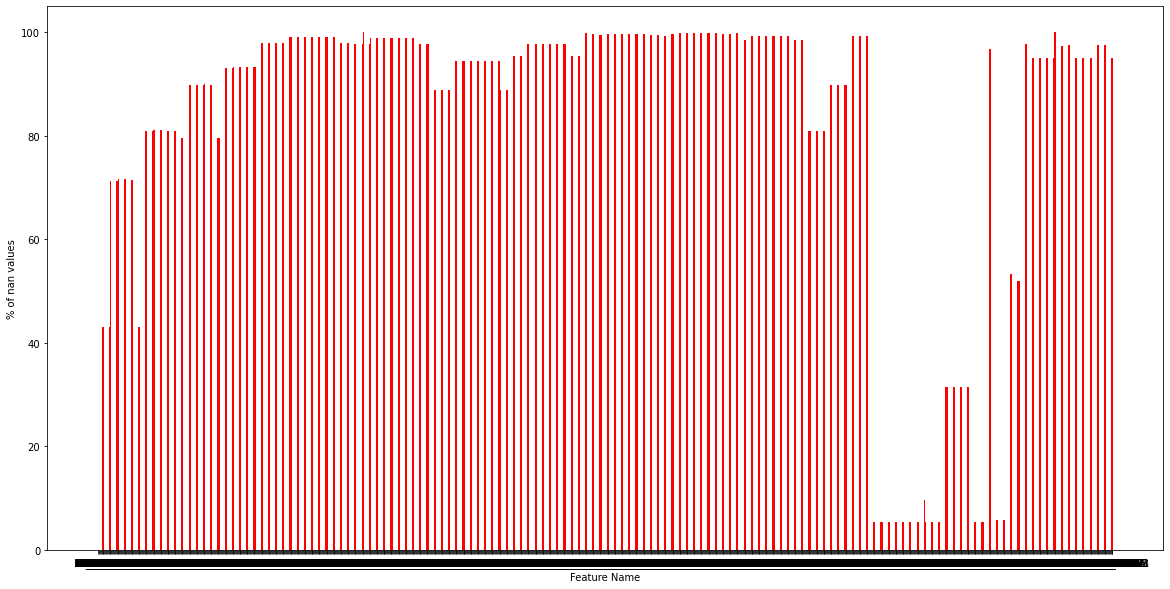

In [98]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Feature Name')
plt.ylabel('% of nan values')
# creating the bar plot
plt.bar(date_columns[1:], total_per_nan_values_date, color ='red',width = 0.3)

As we can see from the above plot that maximum values are above 80%. So there are lots of rows which contains nan values like in numerical and categorical features

# What is the best performance matric for us in this problem

Based on the Research I have done and business constraints I am come of with a performance matric called Mathews Correlation Coefficient(MCC).

## MCC = (TPxTN-FPxFN)/(sqrt(TP+FP)(TP+FN)(TN+FP)(TN+FN))

As we already knows that the dataset is highly imbalanced. So if we use asymmetric matric like precision,recall or F1 score then for a dump model we can also get high accuracy. But MCC will be large only if my both TP and TN will large.
<br>
The reason why I am not using AUC here because AUC only using TP and FP but MCC using all the 4 values of the confusion matric.

In [6]:
final_count_each_st_date = [0]*len(diff_st_date)
final_failure_each_st_date = [0]*len(diff_st_date)
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    columns = chunk_df.columns
    chunk_df_with_response = pd.merge(chunk_df,df_num,on = 'Id')
    no_of_product = []
    no_of_failure = []
    for st_name in diff_st_date:
        count = 0
        fail = 0
        l = []
        for col in columns:
            col_lst = col.split("_")
            if st_name in col_lst:
                l.append(col)
        l.append("Response")

        df_ = chunk_df_with_response[l[:-1]]
        df__ = chunk_df_with_response[l]
        for j in range(len(df_)):
            c = df_.iloc[j]
            for i in c:
                if str(i) != 'nan':
                    count += 1
                    if df__['Response'][j] == 1:
                        fail += 1
                    break
        no_of_product.append(count)
        no_of_failure.append(fail)
        
    for i in range(len(diff_st_date)):
        final_count_each_st_date[i] += no_of_product[i]
        final_failure_each_st_date[i] += no_of_failure[i]
        
print(final_count_each_st_date)
print(final_failure_each_st_date)

119it [50:55, 25.67s/it]

[673862, 673904, 339774, 334708, 335295, 339512, 338988, 335698, 673881, 225679, 224540, 225452, 242061, 242065, 120625, 121445, 119139, 123027, 121081, 121027, 242111, 81409, 80601, 80290, 183727, 83658, 227011, 120729, 9583, 1119629, 1119811, 39003, 24543, 1114695, 1115118, 552108, 569032, 1120394, 27142, 59908, 59914, 59913, 15, 30551, 29804, 59932, 1, 59955, 59923, 29673, 30359, 59853]
[3608, 3606, 1817, 1792, 1800, 1811, 1805, 1805, 3606, 1196, 1223, 1193, 1323, 1323, 681, 640, 661, 662, 654, 669, 1323, 461, 428, 434, 1521, 424, 1695, 822, 67, 6546, 6551, 106, 1106, 5546, 5718, 3177, 3391, 6556, 212, 303, 304, 304, 0, 159, 146, 304, 0, 304, 303, 153, 158, 302]


In [9]:
len(diff_st_date)

52

In [11]:
"""
Now here everything is same as above. The only difference is that instead of production line I am calculating total no of products passes through each station.
So here for categorical feature we have 34 different stations or here we are creating list of size 34 instead of 4.
"""
final_count_each_st_date = [0]*len(diff_st_date)
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\test_date.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    columns = chunk_df.columns
    no_of_product = []
    for st_name in diff_st_date:
        count = 0
        l = []
        for col in columns:
            col_lst = col.split("_")
            if st_name in col_lst:
                l.append(col)

        df_ = chunk_df[l]
        for j in range(len(df_)):
            c = df_.iloc[j]
            for i in c:
                if str(i) != 'nan':
                    count += 1
                    break
        no_of_product.append(count)
        
    for i in range(len(diff_st_date)):
        final_count_each_st_date[i] += no_of_product[i]
        
print(final_count_each_st_date)

119it [48:27, 24.43s/it]

[674504, 674527, 339392, 335693, 335308, 340086, 339647, 335662, 674502, 225727, 224887, 225665, 242415, 242416, 121115, 121289, 119580, 122935, 121237, 121226, 242461, 81595, 80442, 80625, 182856, 83562, 227333, 119556, 9570, 1119437, 1119555, 39235, 24135, 1114494, 1114935, 552113, 568882, 1120266, 27033, 60111, 60119, 60111, 20, 30579, 29991, 60143, 0, 60149, 60125, 29896, 30335, 60074]


In [1]:
final_count_each_st_date = [673862, 673904, 339774, 334708, 335295, 339512, 338988, 335698, 673881, 225679, 224540, 225452, 242061, 242065, 120625, 121445, 119139, 123027, 121081, 121027, 242111, 81409, 80601, 80290, 183727, 83658, 227011, 120729, 9583, 1119629, 1119811, 39003, 24543, 1114695, 1115118, 552108, 569032, 1120394, 27142, 59908, 59914, 59913, 15, 30551, 29804, 59932, 1, 59955, 59923, 29673, 30359, 59853]
final_failure_each_st_date = [3608, 3606, 1817, 1792, 1800, 1811, 1805, 1805, 3606, 1196, 1223, 1193, 1323, 1323, 681, 640, 661, 662, 654, 669, 1323, 461, 428, 434, 1521, 424, 1695, 822, 67, 6546, 6551, 106, 1106, 5546, 5718, 3177, 3391, 6556, 212, 303, 304, 304, 0, 159, 146, 304, 0, 304, 303, 153, 158, 302]

In [9]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Station Name')
plt.ylabel('Number of Products Passes Through the station')
plt.title("Station Name vs No of Products")
# creating the bar plot
plt.bar(diff_st_date, final_count_each_st_date, color ='red',width = 0.3)
fig.savefig("1.jpg")
plt.close(fig)

<BarContainer object of 52 artists>

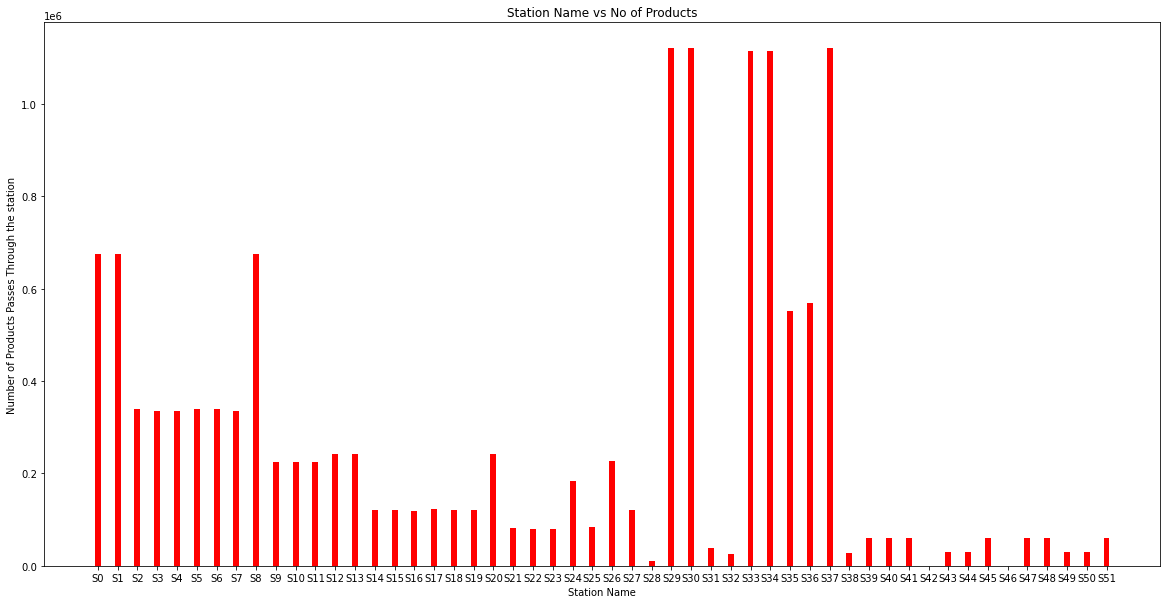

In [8]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Number of Products Passes Through the station')
plt.title("Station Name vs No of Products")
# creating the bar plot
plt.bar(diff_st_date, final_count_each_st_date, color ='red',width = 0.3)

In [10]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Station Name')
plt.ylabel('Total no of failures')
plt.title("Station Name vs total no of Failure")
# creating the bar plot
plt.bar(diff_st_date, final_failure_each_st_date, color ='red',width = 0.3)
fig.savefig("2.jpg")
plt.close(fig)

<BarContainer object of 52 artists>

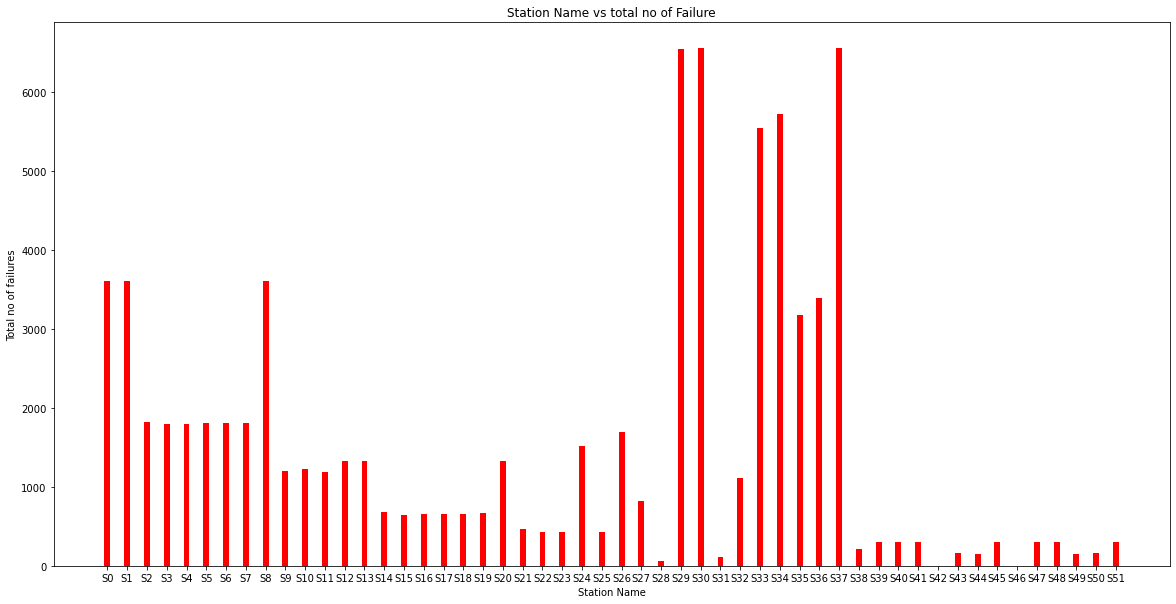

In [11]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Total no of failures')
plt.title("Station Name vs total no of Failure")
# creating the bar plot
plt.bar(diff_st_date, final_failure_each_st_date, color ='red',width = 0.3)

In [11]:
#fraction_of_error = no of failure/total no of product passes through it * 100
fraction_of_error = []
for i in range(len(diff_st_date)):
    fraction_of_error.append(final_failure_each_st_date[i]/ final_count_each_st_date[i] *100)

In [12]:
len(fraction_of_error)

52

In [13]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Station Name')
plt.ylabel('Fraction of Error in Date Feature')
 
# creating the bar plot
plt.bar(diff_st_date, fraction_of_error, color ='red',width = 0.3)
fig.savefig("3.jpg")
plt.close(fig)

<BarContainer object of 52 artists>

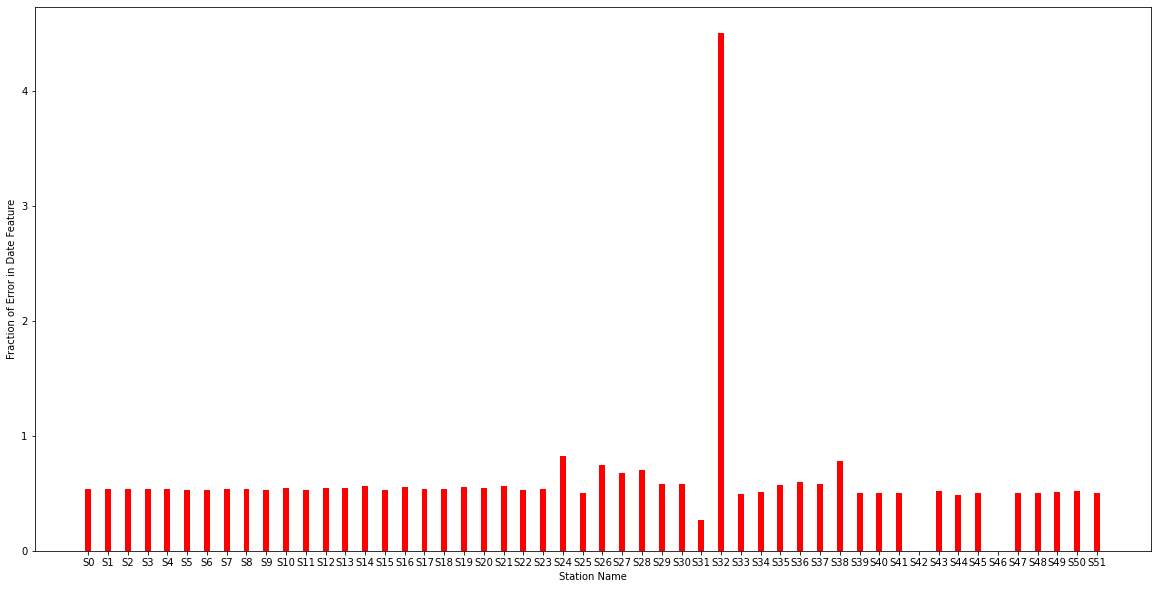

In [16]:
fig = plt.figure(figsize = (20, 10))
plt.xlabel('Station Name')
plt.ylabel('Fraction of Error in Date Feature')
 
# creating the bar plot
plt.bar(diff_st_date, fraction_of_error, color ='red',width = 0.3)

As we can clearly see from the above plot that every station has a resonable height or error but S32 is surprisingly showing large error fraction

In [25]:
df_date = pd.read_csv("C:\\OBS Studio\\self_case_study_file\\train_date.csv",nrows=10,low_memory = False)
columns = df_date.columns

In [29]:
#creating two list to store no of products passes through each production line and its no of failure for the total dataset
final_count_each_line = [0,0,0,0]
final_failure_each_line = [0,0,0,0]

"""
As we already know that this dataset is too large so to load total datast using pandas is not possible for a 8GB RAM laptop. 
So I store them in different chunk of size 10000. I am loading the zip file not csv file and compressed it internally using pandas argument compression.
Here I am specifying low_memory = False to avoid datatype warning
"""
for chunk_df in tqdm(pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv.zip',iterator=True, chunksize=10000,compression='zip',low_memory=False)):
    
    #merging the current categorical dataset with Response column based on Id
    chunk_df_with_response = pd.merge(chunk_df,df_num,on = 'Id')
    
    #storing no of product and no of failure passes through each production line in every iteration
    no_of_product = [] 
    no_of_failure = []
    
    for line_name in diff_line: #iterating every production line
        #initializing total no of products and total no of failures passes through each line
        count = 0 
        fail = 0
        l = [] #a list to store each column name that corresponding to one production line at one iteration
        for col in columns:
            if line_name in col:
                l.append(col)
        l.append("Response") #appending the Response column at the end of the list

        df_ = chunk_df_with_response[l[:-1]] #dataframe with only features that corresponds to the one production line at a time 
        df__ = chunk_df_with_response[l] #dataframe with only features that corresponds to the one production line at a time with Response column
        
        for j in range(len(df_)):
            c = df_.iloc[j] #iterating every row in the dataset 
            for i in c: #iterating every value in that row at each iteration
                if str(i) != 'nan': #checking if that value in nan or not
                    count += 1 #if the value is not nan then the product passes through that production line so I increment one 
                    if df__['Response'][j] == 1: #checking if the product passes through that line then whether it shows failure or not
                        fail += 1 #if it shows failure then we increment one 
                    break
        #finally we append the vlaue for each chunk
        no_of_product.append(count)
        no_of_failure.append(fail)
    
    #now we update the value after each chunk of all production line
    for i in range(4):
        final_count_each_line[i] += no_of_product[i]
        final_failure_each_line[i] += no_of_failure[i]
        
print(final_count_each_line)
print(final_failure_each_line)

119it [09:31,  4.80s/it]

[916029, 267273, 357019, 1183158]
[4924, 1940, 2575, 6875]


In [28]:
final_failure_each_line

[357, 161, 195, 514]

In [27]:
final_count_each_line

[70259, 19742, 26327, 89955]

In [34]:
#showing results in bar plot for better visualization and understanding
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Production Line')
plt.ylabel('Number of Products Passes Through the line')
# creating the bar plot
plt.bar(diff_line, final_count_each_line, color ='red',width = 0.4)
fig.savefig("3.jpg")
plt.close(fig)

<BarContainer object of 4 artists>

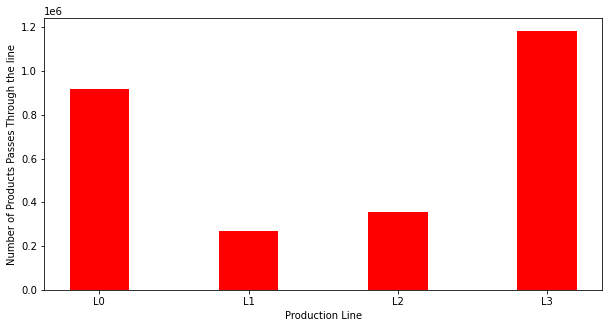

In [30]:
#showing results in bar plot for better visualization and understanding
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Number of Products Passes Through the line')
# creating the bar plot
plt.bar(diff_line, final_count_each_line, color ='red',width = 0.4)

In [35]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Production Line')
plt.ylabel('Total Error')
 
# creating the bar plot
plt.bar(diff_line, final_failure_each_line, color ='red',width = 0.4)
fig.savefig("4.jpg")
plt.close(fig)

<BarContainer object of 4 artists>

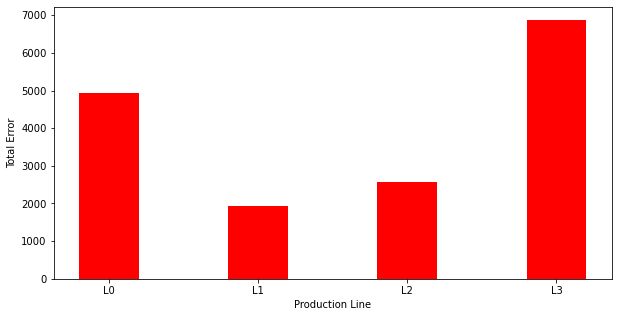

In [31]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Total Error')
 
# creating the bar plot
plt.bar(diff_line, final_failure_each_line, color ='red',width = 0.4)

In [32]:
#fraction_of_error = no of failure/total no of product passes through it * 100
fraction_of_error = []
for i in range(4):
    fraction_of_error.append(final_failure_each_line[i]/ final_count_each_line[i] *100)
fraction_of_error

[0.5375375670420914,
 0.7258495994731978,
 0.7212501295449262,
 0.5810720123601412]

In [37]:
fig, axe = plt.subplots(dpi=800)
plt.xlabel('Production Line')
plt.ylabel('Fraction of Error')
 
# creating the bar plot
plt.bar(diff_line, fraction_of_error, color ='red',width = 0.4)
fig.savefig("5.jpg")
plt.close(fig)

<BarContainer object of 4 artists>

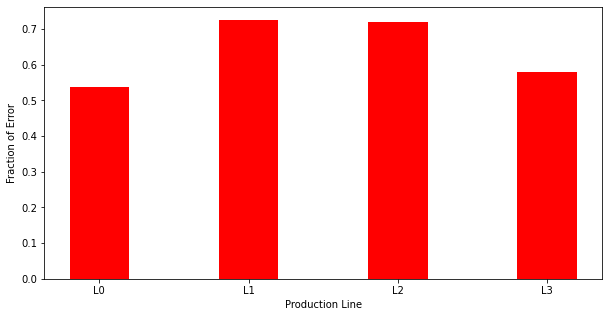

In [33]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Production Line')
plt.ylabel('Fraction of Error')
 
# creating the bar plot
plt.bar(diff_line, fraction_of_error, color ='red',width = 0.4)

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_date_part = pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv', nrows=10000)
print(train_date_part.shape)
print(1.0 * train_date_part.count().sum() / train_date_part.size)
print(train_date_part[:2])

(10000, 1157)
0.17792057044079515
   Id  L0_S0_D1  L0_S0_D3  L0_S0_D5  L0_S0_D7  L0_S0_D9  L0_S0_D11  L0_S0_D13  \
0   4     82.24     82.24     82.24     82.24     82.24      82.24      82.24   
1   6       NaN       NaN       NaN       NaN       NaN        NaN        NaN   

   L0_S0_D15  L0_S0_D17  ...  L3_S50_D4246  L3_S50_D4248  L3_S50_D4250  \
0      82.24      82.24  ...           NaN           NaN           NaN   
1        NaN        NaN  ...           NaN           NaN           NaN   

   L3_S50_D4252  L3_S50_D4254  L3_S51_D4255  L3_S51_D4257  L3_S51_D4259  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   

   L3_S51_D4261  L3_S51_D4263  
0           NaN           NaN  
1           NaN           NaN  

[2 rows x 1157 columns]


In [18]:
# Let's check the min and max times for each station
def get_station_times(dates, withId=False):
    times = []
    cols = list(dates.columns)
    if 'Id' in cols:
        cols.remove('Id')
    for feature_name in cols:
        if withId:
            df = dates[['Id', feature_name]].copy()
            df.columns = ['Id', 'time']
        else:
            df = dates[[feature_name]].copy()
            df.columns = ['time']
        df['station'] = feature_name.split('_')[1][1:]
        df = df.dropna()
        times.append(df)
    return pd.concat(times)

station_times = get_station_times(train_date_part, withId=True).sort_values(by=['Id', 'station'])
print(station_times[:5])
print(station_times.shape)
min_station_times = station_times.groupby(['Id', 'station']).min()['time']
max_station_times = station_times.groupby(['Id', 'station']).max()['time']
print(np.mean(1. * (min_station_times == max_station_times)))

   Id   time station
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
(2048541, 3)
0.9821721580467314


In [20]:
# Read station times for train and test
date_cols = train_date_part.drop('Id', axis=1).count().reset_index().sort_values(by=0, ascending=False)
date_cols['station'] = date_cols['index'].apply(lambda s: s.split('_')[1])
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()
print(date_cols) # selected features

train_date = pd.read_csv('C:\\OBS Studio\\self_case_study_file\\train_date.csv', usecols=date_cols)
print(train_date.shape)
train_station_times = get_station_times(train_date, withId=False)
print(train_station_times.shape)
train_time_cnt = train_station_times.groupby('time').count()[['station']].reset_index()
train_time_cnt.columns = ['time', 'cnt']
print(train_time_cnt.shape)

test_date = pd.read_csv('C:\\OBS Studio\\self_case_study_file\\test_date.csv', usecols=date_cols)
print(test_date.shape)
test_station_times = get_station_times(test_date, withId=False)
print(test_station_times.shape)
test_time_cnt = test_station_times.groupby('time').count()[['station']].reset_index()
test_time_cnt.columns = ['time', 'cnt']
print(test_time_cnt.shape)

['L3_S37_D3949', 'L3_S30_D3541', 'L3_S29_D3428', 'L3_S34_D3877', 'L3_S33_D3870', 'L0_S0_D3', 'L0_S1_D30', 'L0_S8_D145', 'L3_S36_D3919', 'L3_S35_D3910', 'L0_S5_D115', 'L0_S3_D70', 'L0_S6_D120', 'L0_S7_D143', 'L0_S2_D54', 'L0_S4_D106', 'L0_S12_D333', 'L0_S20_D465', 'L0_S13_D355', 'L0_S10_D266', 'L0_S11_D284', 'L0_S9_D192', 'L2_S26_D3084', 'L1_S24_D1828', 'L0_S19_D457', 'L0_S17_D432', 'L0_S14_D380', 'L0_S15_D401', 'L0_S16_D428', 'L2_S27_D3156', 'L0_S18_D447', 'L0_S21_D469', 'L0_S23_D629', 'L0_S22_D608', 'L3_S41_D4021', 'L3_S40_D3981', 'L3_S45_D4129', 'L3_S48_D4203', 'L3_S47_D4155', 'L3_S39_D3974', 'L3_S51_D4255', 'L1_S25_D1887', 'L3_S31_D3848', 'L3_S43_D4097', 'L3_S49_D4208', 'L3_S50_D4254', 'L3_S44_D4122', 'L3_S38_D3953', 'L3_S32_D3852', 'L2_S28_D3234', 'L3_S46_D4135', 'L3_S42_D4057']
(1183747, 52)
(14302781, 2)
(101341, 2)
(1183748, 52)
(14308197, 2)
(101265, 2)


In [ ]:
fig, axe = plt.subplots(dpi=800)
plt.plot(train_time_cnt['time'].values, train_time_cnt['cnt'].values, 'b.', alpha=0.1, label='train')
plt.plot(test_time_cnt['time'].values, test_time_cnt['cnt'].values, 'r.', alpha=0.1, label='test')
plt.title('Original date values')
plt.ylabel('Number of records')
plt.xlabel('Time')
fig.savefig('original_date_values.png', dpi=300)
plt.show()

print((train_time_cnt['time'].min(), train_time_cnt['time'].max()))
print((test_time_cnt['time'].min(), test_time_cnt['time'].max()))

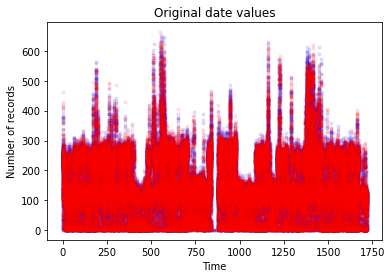

(0.0, 1718.48)
(0.0, 1718.49)


In [21]:
fig = plt.figure()
plt.plot(train_time_cnt['time'].values, train_time_cnt['cnt'].values, 'b.', alpha=0.1, label='train')
plt.plot(test_time_cnt['time'].values, test_time_cnt['cnt'].values, 'r.', alpha=0.1, label='test')
plt.title('Original date values')
plt.ylabel('Number of records')
plt.xlabel('Time')
fig.savefig('original_date_values.png', dpi=300)
plt.show()

print((train_time_cnt['time'].min(), train_time_cnt['time'].max()))
print((test_time_cnt['time'].min(), test_time_cnt['time'].max()))

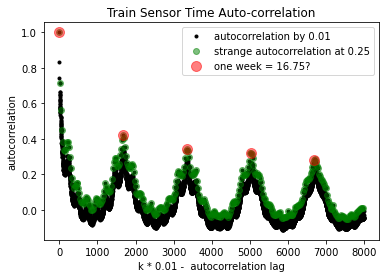

In [22]:
time_ticks = np.arange(train_time_cnt['time'].min(), train_time_cnt['time'].max() + 0.01, 0.01)
time_ticks = pd.DataFrame({'time': time_ticks})
time_ticks = pd.merge(time_ticks, train_time_cnt, how='left', on='time')
time_ticks = time_ticks.fillna(0)
# Autocorrelation
x = time_ticks['cnt'].values
max_lag = 8000
auto_corr_ks = range(1, max_lag)
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
fig = plt.figure()
plt.plot(auto_corr, 'k.', label='autocorrelation by 0.01')
plt.title('Train Sensor Time Auto-correlation')
period = 25
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'go', alpha=0.5, label='strange autocorrelation at 0.25')
period = 1675
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0, 1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'ro', markersize=10, alpha=0.5, label='one week = 16.75?')
plt.xlabel('k * 0.01 -  autocorrelation lag')
plt.ylabel('autocorrelation')
plt.legend(loc=0)
fig.savefig('train_time_auto_correlation.png', dpi=300)

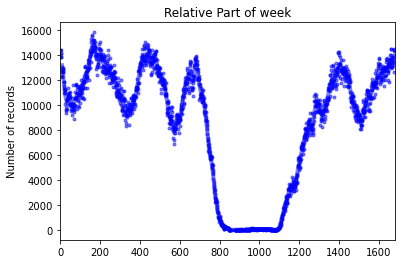

In [23]:
week_duration = 1679
train_time_cnt['week_part'] = ((train_time_cnt['time'].values * 100) % week_duration).astype(np.int64)
# Aggregate weekly stats
train_week_part = train_time_cnt.groupby(['week_part'])[['cnt']].sum().reset_index()
fig = plt.figure()
plt.plot(train_week_part.week_part.values, train_week_part.cnt.values, 'b.', alpha=0.5, label='train count')
y_train = train_week_part['cnt'].rolling(window=20, center=True).mean().values
plt.plot(train_week_part.week_part.values, y_train, 'b-', linewidth=4, alpha=0.5, label='train count smooth')
plt.title('Relative Part of week')
plt.ylabel('Number of records')
plt.xlim(0, 1680)
fig.savefig('week_duration.png', dpi=300)